Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read file csv

In [5]:
df = pd.read_csv (r"C:\Users\DELL\OneDrive\Documents\DA\LearnDA\Portfolio\Graduation_grades\formatted_students_scores.csv")
df.rename(columns={'CityName': 'ThanhPho', 'Code': 'SBD'}, inplace=True)
# Move Toan NguVan NgoaiNgu before SBD
cols = df.columns.tolist()
print (cols)
new_order = ['ThanhPho', 'SBD', 'Toan', 'NguVan', 'NgoaiNgu', 'VatLi', 'HoaHoc', 'SinhHoc', 'LichSu', 'DiaLi', 'GDCD'] 
# + [col for col in cols if col not in ['ThanhPho', 'SBD', 'Toan', 'NguVan', 'NgoaiNgu']]
df = df[new_order]
df.fillna(0, inplace=True)

['ThanhPho', 'SBD', 'DiaLi', 'GDCD', 'HoaHoc', 'LichSu', 'NgoaiNgu', 'NguVan', 'SinhHoc', 'Toan', 'VatLi']


In [6]:
df

,ThanhPho,SBD,Toan,NguVan,NgoaiNgu,VatLi,HoaHoc,SinhHoc,LichSu,DiaLi,GDCD
0,Hà Nội,1000001,8.4,6.75,8.0,6.00,5.25,5.0,0.00,0.00,0.00
1,Hà Nội,1000002,8.6,8.50,7.2,0.00,0.00,0.0,7.25,6.00,8.00
2,Hà Nội,1000003,8.2,8.75,8.2,0.00,0.00,0.0,7.25,7.25,8.75
3,Hà Nội,1000004,4.8,8.50,7.4,0.00,0.00,0.0,7.00,6.00,7.50
4,Hà Nội,1000005,8.6,9.00,7.8,0.00,0.00,0.0,9.00,8.75,8.50
...,...,...,...,...,...,...,...,...,...,...,...
1061600,Hậu Giang,64007282,4.2,6.00,3.0,0.00,0.00,0.0,5.25,6.25,7.50
1061601,Hậu Giang,64007283,5.2,6.00,3.6,0.00,0.00,0.0,6.25,5.75,7.75
1061602,Hậu Giang,64007284,7.2,8.00,7.0,6.25,7.00,8.0,0.00,0.00,0.00
1061603,Hậu Giang,64007285,5.2,5.25,4.4,0.00,0.00,0.0,4.75,6.50,8.75


In [7]:
so_hoc_sinh_moi_tinh = df.groupby('ThanhPho').size().reset_index(name='SoHocSinh')
print(so_hoc_sinh_moi_tinh)

           ThanhPho  SoHocSinh
0          An Giang      20251
1   Bà Rịa-Vũng Tàu      12635
2        Bình Dương      15239
3        Bình Phước      11304
4        Bình Thuận      13133
..              ...        ...
58          Đà Nẵng      13414
59         Đăk Nông       7681
60          Đắk Lắk      20865
61         Đồng Nai      33800
62        Đồng Tháp      16464

[63 rows x 2 columns]


In [8]:
df_tn = df[(df['GDCD'] == 0) & (df['DiaLi'] == 0) & (df['LichSu'] == 0)]

df_xh = df[(df['VatLi'] == 0) & (df['HoaHoc'] == 0) & (df['SinhHoc'] == 0)]

df_tn = df_tn.drop(columns=['GDCD', 'DiaLi', 'LichSu'])
df_xh = df_xh.drop(columns=['VatLi', 'HoaHoc', 'SinhHoc'])

df_tn
# print("Học sinh thi khối tự nhiên:")
# print(df_tn.head())

# print("\nHọc sinh thi khối xã hội:")
# print(df_xh.head())

,ThanhPho,SBD,Toan,NguVan,NgoaiNgu,VatLi,HoaHoc,SinhHoc
0,Hà Nội,1000001,8.4,6.75,8.0,6.00,5.25,5.00
8,Hà Nội,1000009,8.2,8.00,8.6,8.25,4.25,6.00
10,Hà Nội,1000011,7.2,8.50,9.0,7.75,6.75,6.25
16,Hà Nội,1000017,7.0,8.75,7.8,3.75,7.50,7.25
17,Hà Nội,1000018,8.2,6.00,9.0,7.75,6.75,6.75
...,...,...,...,...,...,...,...,...
1061589,Hậu Giang,64007271,7.8,6.50,5.2,7.50,7.00,5.75
1061590,Hậu Giang,64007272,6.8,7.25,5.8,6.25,7.25,7.00
1061592,Hậu Giang,64007274,7.0,7.50,5.0,3.00,6.25,6.00
1061599,Hậu Giang,64007281,6.4,7.25,3.8,5.75,4.50,4.25


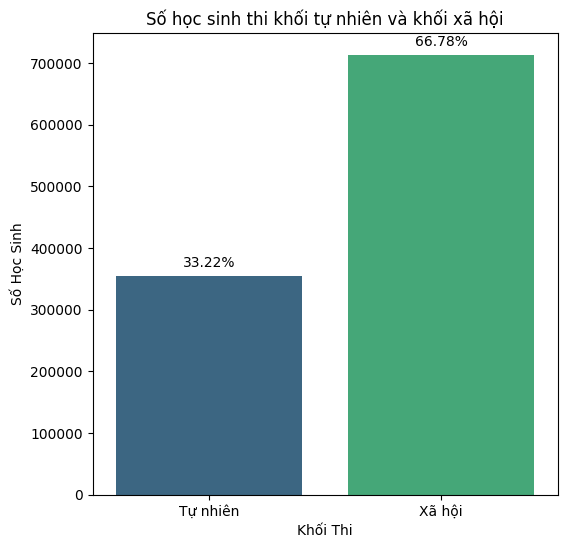

In [20]:
so_hoc_sinh_khoi_tu_nhien = len(df_tn)
so_hoc_sinh_khoi_xa_hoi = len(df_xh)
# print(so_hoc_sinh_khoi_tu_nhien)
data = {
    'Khối Thi': ['Tự nhiên', 'Xã hội'],
    'Số Học Sinh': [so_hoc_sinh_khoi_tu_nhien, so_hoc_sinh_khoi_xa_hoi]
}
df_visualization = pd.DataFrame(data)
total_students = so_hoc_sinh_khoi_tu_nhien + so_hoc_sinh_khoi_xa_hoi

plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Khối Thi', y='Số Học Sinh', hue='Khối Thi', data=df_visualization, palette='viridis', dodge=False, legend=False)

# Thêm tỉ lệ trên đỉnh cột
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total_students:.2%}'
    ax.annotate(f'{percentage}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 4),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', 
                va='bottom')

plt.title('Số học sinh thi khối tự nhiên và khối xã hội')
plt.xlabel('Khối Thi')
plt.ylabel('Số Học Sinh')
plt.show()